# **Machine Learning Project Report - Haris Yafie**

Proyek untuk pembelajaran saya dalam kursus Dicoding Machine Learning Terapan. Proyek ini tentang prediksi harga emas dunia terhadap IDR. Data yang digunakan berkisar dari 24 April 2023 hingga 22 April 2025.

ID Dicoding: harisyafie

Email: yafie345@gmail.com

# **Global Gold Price to IDR Prediction**

## **Problem Statement**

1.   Sulitnya memprediksi harga emas terhadap Rupiah karena tingginya volatilitas dan pengaruh faktor eksternal seperti kurs USD, inflasi global, dan ketegangan geopolitik.
2.   Peningkatan permintaan terhadap emas yang menyebabkan kenaikan harga emas secara drastis



## **Initialization**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## **Data Preparation**

### **Data Collecting**
Download the dataset dari Google Drive saya. Data dikumpulkan dari website investing.com [Data Historis Emas Spot terhadap IDR](https://id.investing.com/currencies/gau-idr-historical-data). Penggunaan Google Drive mempermudah akses data

In [2]:
!gdown 1AmzhhW68CDtRw2v9ZAZL9W33Sm7jTkRJ

Downloading...
From: https://drive.google.com/uc?id=1AmzhhW68CDtRw2v9ZAZL9W33Sm7jTkRJ
To: /content/Harga_Emas_Global_IDR.xlsx
100% 45.6k/45.6k [00:00<00:00, 53.5MB/s]


### **Data Loading**
Membaca data yang telah kita download menggunakan library *pandas* dan fungsi `read_excel`.


In [3]:
# Load data
file_path = "/content/Harga_Emas_Global_IDR.xlsx"
df = pd.read_excel(file_path)

In [4]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,22/04/2025,1872926,1853054,1895569,1844322,NaN,1.00
1,21/04/2025,1854380,1809367,1858998,1809367,NaN,3.12
2,18/04/2025,1798256,1799240,1799240,1798256,NaN,-0.05
3,17/04/2025,1799240,1809885,1816555,1781944,NaN,-0.65
4,16/04/2025,1811055,1760120,1814451,1758230,NaN,3.11
...,...,...,...,...,...,...,...
522,28/04/2023,938532,939380,941256,932475,NaN,-0.08
523,27/04/2023,939284,949999,951250,933629,NaN,-1.12
524,26/04/2023,949944,954860,960279,946176,NaN,-0.50
525,25/04/2023,954732,952250,956374,943429,NaN,0.25


### **Data Cleaning**

Setelah data dimuat, langkah selanjutnya adalah memeriksa kualitas data dan melakukan pembersihan.  
Pertama, kita akan mengubah format kolom `'Tanggal'` menjadi format datetime. Setelah itu, data akan diurutkan berdasarkan kolom `'Tanggal'`.  
Kemudian, kita akan menghapus kolom `'Vol.'`, `'Pembukaan'`, `'Tertinggi'`, `'Terendah'`, dan `'Perubahan%'` karena kolom-kolom tersebut tidak digunakan dalam proses prediksi.


In [5]:
# Clean data
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)
df = df.sort_values('Tanggal').reset_index(drop=True)
df = df.drop(columns=['Vol.', 'Pembukaan', 'Tertinggi', 'Terendah', 'Perubahan%'])

In [6]:
df

,Tanggal,Terakhir
0,2023-04-24,952366
1,2023-04-25,954732
2,2023-04-26,949944
3,2023-04-27,939284
4,2023-04-28,938532
...,...,...
522,2025-04-16,1811055
523,2025-04-17,1799240
524,2025-04-18,1798256
525,2025-04-21,1854380


## **Exploratory Data Analysis**
Sebelum membangun model prediksi, penting untuk memahami karakteristik dan pola dari data historis yang kita miliki.  
Melalui proses **Exploratory Data Analysis (EDA)**, kita akan melakukan eksplorasi awal terhadap data harga emas dalam IDR untuk melihat:

- Distribusi dan tren harga emas dari waktu ke waktu  
- Pola musiman, lonjakan harga, atau fluktuasi signifikan  
- Insight awal yang dapat membantu dalam pemodelan

Tahapan ini membantu kita untuk **mengidentifikasi potensi anomali, outlier, atau tren yang konsisten** dalam data, sehingga model yang dibangun nantinya bisa lebih akurat dan relevan dengan kondisi riil.


### **Statistics Descriptive Analysis**

Langkah selanjutnya adalah melakukan analisis statistik deskriptif untuk mendapatkan gambaran umum mengenai data harga emas.  
Analisis ini mencakup beberapa nilai penting seperti:

- **Mean** (rata-rata)
- **Standard Deviation** (simpangan baku)
- **Count** (jumlah data)
- **Minimum dan Maximum**
- **Kuartil** (Q1, Median, Q3)

Informasi ini berguna untuk memahami **penyebaran data**, mendeteksi **potensi outlier**, serta melihat apakah data memiliki kecenderungan tertentu yang bisa berpengaruh terhadap proses pemodelan selanjutnya.


In [7]:
# Descriptive stats, formatted
desc_stats = df['Terakhir'].describe().rename({
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})

# Format numbers to include commas (IDR style)
formatted_stats = desc_stats.apply(lambda x: f"{x:,.0f}")

print("Descriptive Statistics for Closing Price of Gold Spot (IDR):\n")
print(formatted_stats)


Descriptive Statistics for Closing Price of Gold Spot (IDR):

Count                 527
Mean            1,178,196
Std Dev           217,310
Min               912,144
Q1 (25%)          975,623
Median (50%)    1,201,496
Q3 (75%)        1,331,908
Max             1,872,926
Name: Terakhir, dtype: object


**Insight:**
- Harga emas rata-rata berada di 1.2 juta IDR.
- Fluktuasi harga cukup tinggi.
- Distribusi sedikit condong ke kanan (mean < median), tapi tetap seimbang.


### **Data Visualization**
Setelah melakukan analisis statistik deskriptif, langkah selanjutnya adalah membuat visualisasi data untuk mendapatkan pemahaman yang lebih mendalam.  
Visualisasi akan dilakukan menggunakan **plot time series** untuk melihat bagaimana tren harga emas berubah dari waktu ke waktu.

Dengan melihat visualisasi ini, kita dapat:
- Mengidentifikasi pola tren jangka panjang  
- Melihat fluktuasi atau volatilitas harga  
- Menemukan titik-titik ekstrem seperti lonjakan atau penurunan tajam  

Visualisasi ini juga menjadi langkah awal yang penting sebelum membangun model prediksi berbasis data historis.




### **Line Plot – Harga Penutupan Emas dari Waktu ke Waktu**

Visualisasi ini menunjukkan tren harga emas dunia dalam Rupiah dari April 2023 hingga April 2025. Terlihat adanya:
- Tren kenaikan secara bertahap
- Beberapa lonjakan signifikan di akhir periode
- Fluktuasi tetap ada, tapi tren jangka panjang meningkat

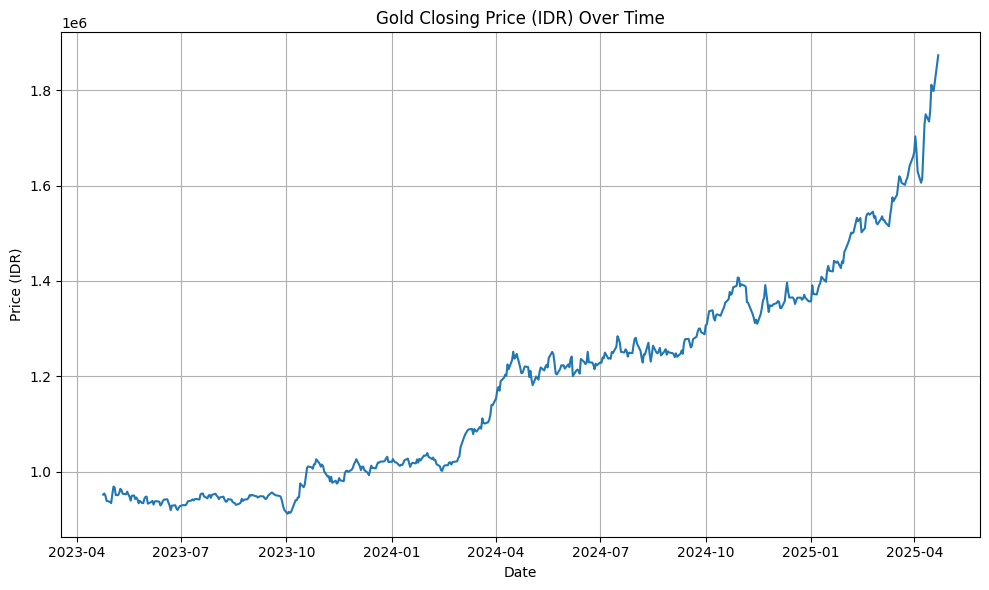

In [8]:
# 1. Line plot of closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Terakhir'])
plt.title('Gold Closing Price (IDR) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Boxplot – Distribusi Harga Emas per Bulan**

Boxplot ini mengungkap:
- Perbedaan harga antar bulan
- Outlier di bulan tertentu
- IQR makin besar di bulan akhir → volatilitas meningkat


<ipython-input-9-c9023fc9fab5>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(monthly_data, labels=sorted(df['Month'].unique()))


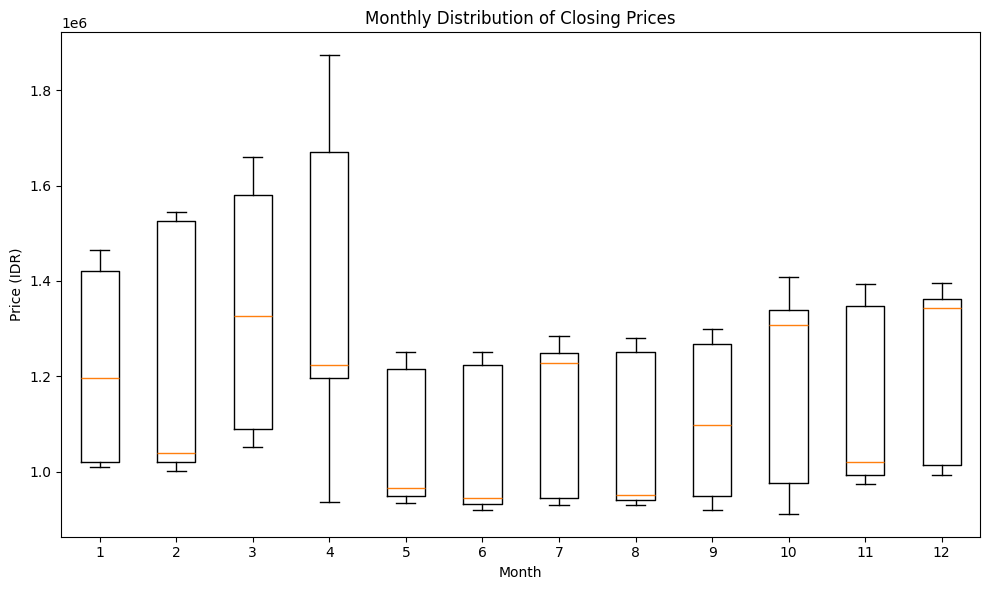

In [9]:
# 2. Monthly boxplot of closing prices
df['Month'] = df['Tanggal'].dt.month
monthly_data = [df[df['Month'] == m]['Terakhir'] for m in sorted(df['Month'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(monthly_data, labels=sorted(df['Month'].unique()))
plt.title('Monthly Distribution of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Price (IDR)')
plt.tight_layout()
plt.show()

## **Modelling**

Setelah melalui tahap pembersihan data dan eksplorasi data (EDA), langkah selanjutnya adalah membangun model machine learning untuk melakukan prediksi harga emas dalam IDR. Pada bagian ini, kita akan mempersiapkan semua komponen yang dibutuhkan untuk proses pelatihan model, dimulai dari **import library**, **normalisasi data**, hingga **pembangunan arsitektur model** seperti **LSTM** dan **GRU** yang umum digunakan dalam peramalan data deret waktu (*time series*).

Pendekatan yang digunakan bertujuan untuk menangkap pola historis harga emas dan memproyeksikan tren harga ke depan, baik dalam jangka pendek maupun menengah. Model akan dilatih menggunakan data historis, dan performanya akan dievaluasi menggunakan metrik kesalahan seperti MAE dan RMSE.


### **Import Library**

Pada bagian ini, kita mengimpor berbagai library Python yang digunakan dalam proyek peramalan harga emas. Setiap library memiliki fungsi dan peran masing-masing:

- `pandas` dan `numpy`  
  Digunakan untuk manipulasi data. `pandas` berguna untuk mengelola data dalam bentuk tabel (DataFrame), sedangkan `numpy` digunakan untuk operasi numerik dan array.

- `sklearn.preprocessing.MinMaxScaler`  
  Digunakan untuk melakukan **normalisasi** data harga emas ke rentang 0–1 sebelum dimasukkan ke dalam model.

- `tensorflow` dan `keras`  
  Framework utama untuk membuat, melatih, dan mengevaluasi model deep learning seperti **LSTM** dan **GRU**.  
  - `Sequential`: struktur model berlapis secara berurutan.  
  - `LSTM`, `GRU`: jenis layer RNN untuk time series.  
  - `Dense`: layer fully-connected (output).  
  - `Dropout`: digunakan untuk mengurangi overfitting.

- `matplotlib.pyplot`  
  Library visualisasi untuk membuat grafik hasil prediksi model, tren historis harga emas, dan perbandingan performa.

- `sklearn.metrics`  
  Digunakan untuk mengukur performa model dengan metrik seperti **Mean Absolute Error (MAE)** dan **Root Mean Squared Error (RMSE)**.


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **Data Scaling**

langkah penting yang dilakukan adalah **Data Scaling**. Pada proyek ini, kolom `Terakhir` (harga emas harian) dinormalisasi menggunakan `MinMaxScaler` agar berada dalam rentang **0 hingga 1**.

Tujuan dari scaling ini adalah:

- **Menstabilkan proses pelatihan model**  
  Nilai harga emas dalam IDR bisa mencapai ratusan ribu hingga jutaan. Jika langsung dimasukkan ke model tanpa normalisasi, nilai yang besar dapat membuat proses training tidak stabil dan memperlambat konvergensi.

- **Mempercepat konvergensi model**  
  Model deep learning (seperti LSTM/GRU) lebih cepat belajar jika nilai input berada dalam skala yang konsisten.

- **Mengoptimalkan fungsi aktivasi**  
  Fungsi aktivasi seperti `tanh` dan `sigmoid` bekerja paling optimal jika input berada dalam kisaran yang kecil (biasanya antara -1 hingga 1 atau 0 hingga 1).

- **Fokus pada pola, bukan skala**  
  Dengan normalisasi, model dapat lebih fokus pada pola pergerakan harga (naik/turun) daripada nilai absolut harga emas.

Oleh karena itu, normalisasi menjadi tahap penting agar model dapat mempelajari tren dengan lebih efisien dan akurat.



In [11]:
# Normalize 'Terakhir'
scaler = MinMaxScaler()
df['Norm'] = scaler.fit_transform(df[['Terakhir']])

# Sequence generation
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

WINDOW_SIZE = 30
data = df['Norm'].values
X, y = create_sequences(data, WINDOW_SIZE)


### **Data Train-Test Splitting**

Dalam pemodelan machine learning, membagi data menjadi data pelatihan (*training*) dan data pengujian (*testing*) merupakan langkah penting untuk mengukur kemampuan generalisasi model. Pada kasus prediksi deret waktu (time series), pembagian data dilakukan **berdasarkan urutan waktu** — bukan secara acak — agar struktur temporal dari data tetap terjaga.

Dalam proyek ini, data historis harga emas yang telah dinormalisasi dibagi dengan proporsi:
- **80%** untuk data pelatihan (*training set*)
- **20%** untuk data pengujian (*test set*)

Dengan pendekatan ini, model akan belajar dari pola harga di masa lalu (training) dan diuji menggunakan data masa depan yang belum pernah dilihat sebelumnya (testing). Hal ini memastikan bahwa proses evaluasi mencerminkan kemampuan model dalam memprediksi data baru secara realistis.


In [12]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM/GRU: (samples, timesteps, features)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


### **Model Building**

Setelah data dipersiapkan, langkah selanjutnya adalah membangun arsitektur model deep learning untuk melakukan prediksi harga emas. Pada proyek ini, digunakan dua jenis model Recurrent Neural Network (RNN) yang populer untuk data deret waktu, yaitu **LSTM (Long Short-Term Memory)** dan **GRU (Gated Recurrent Unit)**.

#### **1. Membuat Urutan Input (Sequence Maker)**
Sebelum model dapat dilatih, data historis harus diubah menjadi bentuk sekuensial. Fungsi `make_seq()` digunakan untuk memotong data harga emas yang telah dinormalisasi menjadi window berukuran tetap (misalnya 30 hari), di mana setiap window akan digunakan untuk memprediksi harga pada hari ke-31.

In [13]:
# ---------- 1. SEQUENCE MAKER ----------
def make_seq(arr, win=30):
    X, y = [], []
    for i in range(len(arr) - win):
        X.append(arr[i:i+win])
        y.append(arr[i+win])
    return np.array(X)[..., np.newaxis], np.array(y)

WIN = 30
X, y = make_seq(df['Norm'].values, WIN)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#### **2. Arsitektur Model**
Fungsi `build()` digunakan untuk membuat model sesuai dengan jenis RNN yang dipilih (`LSTM` atau `GRU`). Struktur model terdiri dari:

- Dua layer LSTM/GRU berurutan, dengan parameter `return_sequences=True` pada layer pertama agar output dapat diteruskan ke layer berikutnya.
- Layer `Dropout` digunakan untuk mengurangi risiko overfitting dengan cara mengabaikan sejumlah unit selama pelatihan.
- Layer output `Dense(1)` digunakan untuk menghasilkan prediksi harga pada 1 hari ke depan.
- Model dikompilasi dengan **optimizer Adam**, fungsi loss **Mean Absolute Error (MAE)**, dan metrik evaluasi yang sama.

Model yang dibangun akan dilatih menggunakan data pelatihan, dan diuji performanya menggunakan data pengujian. Dengan membandingkan hasil dari model LSTM dan GRU, kita dapat menentukan arsitektur mana yang memberikan performa terbaik untuk tugas prediksi ini.


In [ ]:
# ---------- 2. MODEL FUNCTION ----------
def build(model_type, units=32, in_shape=(WIN, 1), dropout_rate=0.1, lr=0.001):
    model = Sequential()

    if model_type == 'LSTM':
        model.add(LSTM(units, return_sequences=True, activation='tanh', input_shape=in_shape))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units, activation='tanh'))
        model.add(Dropout(dropout_rate))

    elif model_type == 'GRU':
        model.add(GRU(units, return_sequences=True, activation='tanh', input_shape=in_shape))
        model.add(Dropout(dropout_rate))
        model.add(GRU(units, activation='tanh'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss='mae',
              metrics=['mae'])

    return model

#### **GRU Model**

Setelah fungsi `build()` didefinisikan, kita dapat menggunakannya untuk membuat model GRU dengan memanggil `build(model_type='GRU')`. Pemanggilan `model.summary()` digunakan untuk menampilkan arsitektur model secara ringkas, termasuk jumlah layer, output dari setiap layer, dan total parameter yang akan dilatih.

Langkah ini penting untuk memastikan bahwa struktur model sudah sesuai sebelum dilakukan proses pelatihan.


In [14]:
model_gru = build(model_type='GRU')
model_gru.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 30, 32)         │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

#### **LSTM Model**

Berlaku juga untuk membuat model LSTM dengan memanggil `build(model_type='LSTM')`. Pemanggilan `model.summary()` digunakan untuk menampilkan arsitektur model secara ringkas, termasuk jumlah layer, output dari setiap layer, dan total parameter yang akan dilatih.

In [15]:
model_lstm = build(model_type='LSTM')
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

### **Train the Model**

Setelah model GRU dan LSTM berhasil dibangun dan diinisialisasi, langkah selanjutnya adalah melakukan proses **pelatihan (training)**. Pada tahap ini, model akan mempelajari pola historis dari harga emas berdasarkan data yang telah dibagi sebelumnya (training set).

Model akan dilatih menggunakan fungsi `fit()`, dengan parameter sebagai berikut:
- **Epochs**: jumlah iterasi pelatihan penuh terhadap seluruh data training.
- **Batch size**: jumlah sampel yang digunakan sebelum parameter model diperbarui.
- **Validation split**: sebagian kecil dari data training yang digunakan untuk mengevaluasi performa model selama pelatihan.

Selama proses training, model akan menghitung loss dan metrik MAE (Mean Absolute Error) pada data pelatihan dan validasi untuk mengukur seberapa baik model belajar. Nilai-nilai ini dapat digunakan untuk memantau overfitting dan convergence model.

Proses ini dilakukan secara terpisah untuk model GRU dan model LSTM, sehingga nantinya performa keduanya dapat dibandingkan secara objektif.


#### **GRU Model**

Model GRU dilatih menggunakan data training dengan 100 epoch, batch size sebesar 32, dan validation split sebesar 10%.  
Proses training ini bertujuan untuk menyesuaikan bobot-bobot model agar mampu meminimalkan error terhadap data historis.

Hasil pelatihan disimpan ke dalam variabel `history_gru` yang nantinya dapat digunakan untuk visualisasi learning curve dan evaluasi performa model.


In [16]:
history_gru = model_gru.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.1058 - mae: 0.1058 - val_loss: 0.0516 - val_mae: 0.0516
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0402 - mae: 0.0402 - val_loss: 0.0340 - val_mae: 0.0340
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0239 - mae: 0.0239 - val_loss: 0.0188 - val_mae: 0.0188
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0204 - mae: 0.0204 - val_loss: 0.0177 - val_mae: 0.0177
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0183 - mae: 0.0183 - val_loss: 0.0185 - val_mae: 0.0185
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - mae: 0.0160 - val_loss: 0.0175 - val_mae: 0.0175
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0185 - mae: 0.0185 - val_loss: 0.0170 - val_mae: 0.0170
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0165 - mae: 0.0165 - val_loss: 0.0172 - val_mae: 0.0172
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - lo

#### **LSTM Model**

Model LSTM dilatih menggunakan data training dengan 100 epoch, batch size sebesar 32, dan validation split sebesar 10%.  
Proses training ini bertujuan untuk menyesuaikan bobot-bobot model agar mampu meminimalkan error terhadap data historis.

Hasil pelatihan disimpan ke dalam variabel `history_lstm` yang nantinya dapat digunakan untuk visualisasi learning curve dan evaluasi performa model.


In [17]:
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.1183 - mae: 0.1183 - val_loss: 0.0287 - val_mae: 0.0287
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0491 - mae: 0.0491 - val_loss: 0.0303 - val_mae: 0.0303
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0289 - mae: 0.0289 - val_loss: 0.0289 - val_mae: 0.0289
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0228 - mae: 0.0228 - val_loss: 0.0293 - val_mae: 0.0293
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0233 - mae: 0.0233 - val_loss: 0.0299 - val_mae: 0.0299
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0210 - mae: 0.0210 - val_loss: 0.0283 - val_mae: 0.0283
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0250 - val_mae: 0.0250
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0212 - mae: 0.0212 - val_loss: 0.0269 - val_mae: 0.0269
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - lo

### **Model Evaluation**

Setelah proses training selesai, tahap berikutnya adalah **evaluasi performa model** untuk mengetahui seberapa akurat model dalam melakukan prediksi harga emas. Evaluasi dilakukan terhadap data uji (*testing set*) yang belum pernah dilihat oleh model saat pelatihan.

Pada tahap ini, dilakukan:
1. **Prediksi** harga emas menggunakan data uji
2. **Inverse transform** untuk mengembalikan data ke skala IDR asli
3. **Perhitungan metrik evaluasi**, yaitu:
   - **MAE (Mean Absolute Error)**: rata-rata selisih absolut antara nilai aktual dan prediksi
   - **RMSE (Root Mean Squared Error)**: menghitung error dengan penalti lebih besar terhadap prediksi yang jauh meleset
4. **Visualisasi** hasil prediksi model terhadap data aktual untuk melihat seberapa dekat model mengikuti tren sebenarnya

Proses evaluasi ini dilakukan secara terpisah untuk model GRU dan LSTM agar dapat dibandingkan performanya secara adil dan objektif.


#### **Evaluasi Model GRU**

Pada bagian ini, model GRU digunakan untuk memprediksi harga emas berdasarkan data uji. Hasil prediksi kemudian dibandingkan dengan nilai aktual menggunakan metrik RMSE dan MAE.  
Selain itu, grafik juga ditampilkan untuk memvisualisasikan seberapa dekat prediksi GRU mengikuti tren harga emas sesungguhnya.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step
RMSE: 20821.06
MAE: 15176.30


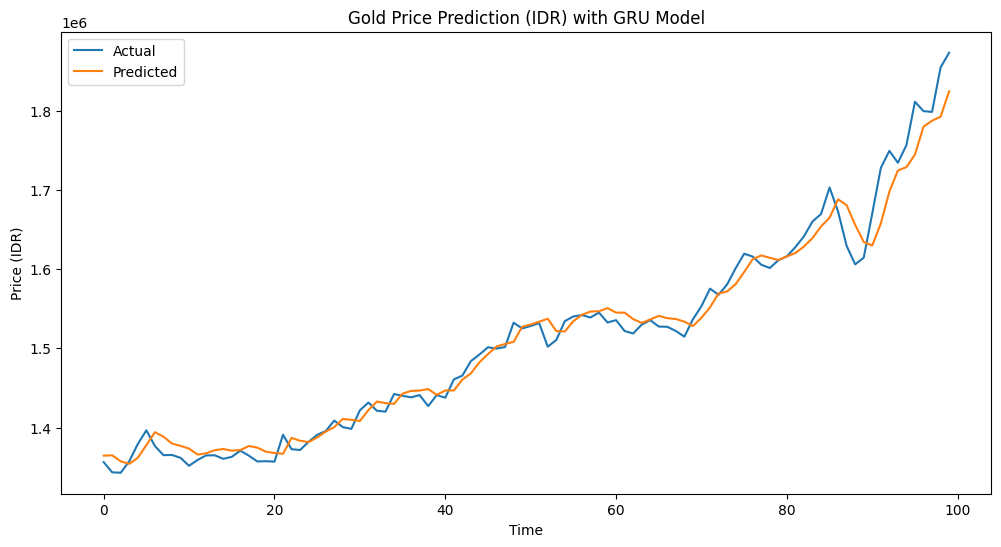

In [18]:
# Predict
y_pred_gru = model_gru.predict(X_test)
y_pred_inv_gru = scaler.inverse_transform(y_pred_gru)
y_test_inv_gru = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse_gru = np.sqrt(mean_squared_error(y_test_inv_gru, y_pred_inv_gru))
mae_gru = mean_absolute_error(y_test_inv_gru, y_pred_inv_gru)

print(f'RMSE: {rmse_gru:.2f}')
print(f'MAE: {mae_gru:.2f}')

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_inv_gru, label='Actual')
plt.plot(y_pred_inv_gru, label='Predicted')
plt.legend()
plt.title('Gold Price Prediction (IDR) with GRU Model')
plt.xlabel('Time')
plt.ylabel('Price (IDR)')
plt.show()


##### **Interpretasi Hasil Evaluasi Model GRU**

Berdasarkan hasil evaluasi terhadap model GRU, diperoleh metrik sebagai berikut:

- **RMSE (Root Mean Squared Error)**: 20.821,06
- **MAE (Mean Absolute Error)**: 15.176,30

Nilai MAE dan RMSE yang relatif rendah menunjukkan bahwa model GRU memiliki tingkat kesalahan yang kecil dalam memprediksi harga emas dibandingkan dengan nilai aktual. MAE mengukur rata-rata selisih absolut antara prediksi dan data aktual, sementara RMSE memberikan penalti lebih besar terhadap prediksi yang jauh meleset.

Pada grafik di atas, terlihat bahwa **garis prediksi (orange)** berhasil mengikuti tren **garis aktual (biru)** dengan cukup baik. Model GRU mampu menangkap pola kenaikan harga emas secara umum, meskipun terdapat beberapa deviasi kecil terutama pada fluktuasi tajam.

Secara keseluruhan, model GRU menunjukkan performa yang baik dan dapat diandalkan dalam memprediksi harga emas dalam IDR berdasarkan data historis. Hasil ini menjadi salah satu kandidat kuat untuk digunakan dalam prediksi 30 hari ke depan.


#### **Evaluasi Model LSTM**

Evaluasi model LSTM dilakukan dengan cara yang sama seperti pada GRU. Prediksi dari model LSTM dibandingkan dengan data aktual, lalu dihitung nilai error menggunakan RMSE dan MAE.  
Grafik hasil prediksi juga digunakan untuk menilai kualitas visual dari performa model dalam menangkap pola harga emas.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
RMSE: 41024.68
MAE: 28934.15


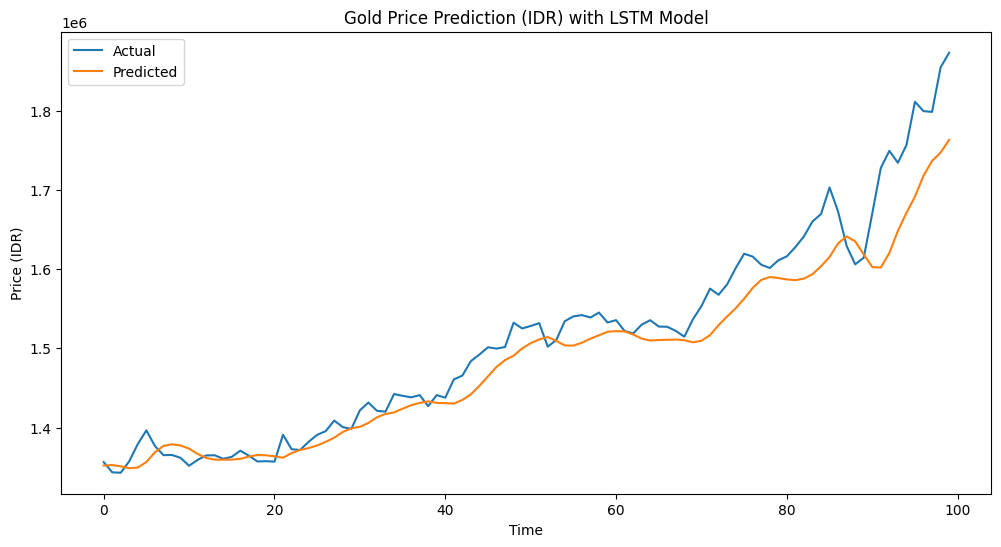

In [19]:
# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_inv_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_inv_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv_lstm, y_pred_inv_lstm))
mae_lstm = mean_absolute_error(y_test_inv_lstm, y_pred_inv_lstm)

print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_inv_lstm, label='Actual')
plt.plot(y_pred_inv_lstm, label='Predicted')
plt.legend()
plt.title('Gold Price Prediction (IDR) with LSTM Model')
plt.xlabel('Time')
plt.ylabel('Price (IDR)')
plt.show()


##### **Interpretasi Hasil Evaluasi Model LSTM**

Berdasarkan hasil evaluasi terhadap model LSTM, diperoleh metrik sebagai berikut:

- **RMSE (Root Mean Squared Error)**: 41.024,68
- **MAE (Mean Absolute Error)**: 28.934,15

Dibandingkan dengan GRU, model LSTM menghasilkan nilai error yang lebih tinggi, baik pada RMSE maupun MAE. Hal ini menunjukkan bahwa LSTM memiliki akurasi yang lebih rendah dalam memprediksi harga emas pada data uji.

Dari grafik, terlihat bahwa garis prediksi model LSTM (orange) cenderung **lebih halus dan konservatif**, dan **kurang responsif terhadap perubahan tajam** pada tren harga aktual (biru). Model ini sedikit tertinggal dalam mengikuti kenaikan tajam harga emas yang terjadi pada periode akhir.

Meskipun LSTM berhasil menangkap arah tren secara umum, ia cenderung menghasilkan prediksi yang terlalu rata pada periode volatil. Hal ini mengindikasikan bahwa model LSTM mungkin lebih cocok untuk data yang tidak terlalu fluktuatif, namun kurang optimal untuk kondisi pasar yang dinamis seperti pergerakan harga emas.

### **Kesimpulan Evaluasi Model**
Secara keseluruhan, performa LSTM dalam eksperimen ini **kurang baik dibandingkan GRU**. Sehingga model yang dipilih pada proyek ini yaitu:

***MODEL GRU***


## **Prediction**

Setelah melalui proses pelatihan dan evaluasi terhadap dua arsitektur model, yaitu GRU dan LSTM, model **GRU dipilih sebagai model terbaik** berdasarkan nilai error yang lebih rendah serta kemampuannya dalam mengikuti tren harga emas dengan lebih akurat.

Pada bagian ini, model GRU yang telah dilatih akan digunakan untuk melakukan **prediksi harga emas selama 30 hari ke depan**. Proses prediksi dilakukan secara bertahap dengan menggunakan pendekatan rekursif, di mana prediksi sebelumnya akan digunakan sebagai input untuk memprediksi hari berikutnya. Hasil prediksi akan ditampilkan dalam bentuk grafik serta diringkas dalam bentuk statistik untuk memberikan gambaran tren harga emas dalam waktu dekat.


### **Prediksi Harga Emas 30 Hari ke Depan**

Untuk melakukan prediksi harga emas 30 hari ke depan, digunakan fungsi `forecast_future()` yang bekerja secara **rekursif**.  
Artinya, prediksi untuk hari ke-1 digunakan sebagai input untuk memprediksi hari ke-2, dan seterusnya hingga jumlah hari yang diinginkan (dalam hal ini 30 hari).

Berikut langkah-langkah yang dilakukan:

1. **Mengambil urutan terakhir** dari data historis sebagai input awal untuk prediksi.
2. Menggunakan model GRU yang telah dilatih untuk memprediksi satu hari ke depan, lalu memasukkan hasil prediksi tersebut sebagai bagian dari input selanjutnya.
3. Proses ini diulang sebanyak 30 kali untuk membentuk prediksi berurutan selama 30 hari.
4. Hasil prediksi yang masih dalam bentuk ter-normalisasi dikembalikan ke skala IDR asli menggunakan `inverse_transform()`.
5. Grafik dibuat untuk menampilkan:
   - Harga historis 60 hari terakhir
   - Hasil prediksi harga emas selama 30 hari ke depan

Selain visualisasi, dicetak juga ringkasan statistik dari hasil prediksi:
- Harga terakhir (day-30)
- Nilai minimum, maksimum, dan rata-rata dari prediksi

Hasil ini disimpan ke dalam DataFrame yang dapat digunakan untuk analisis lanjutan atau visualisasi tambahan.


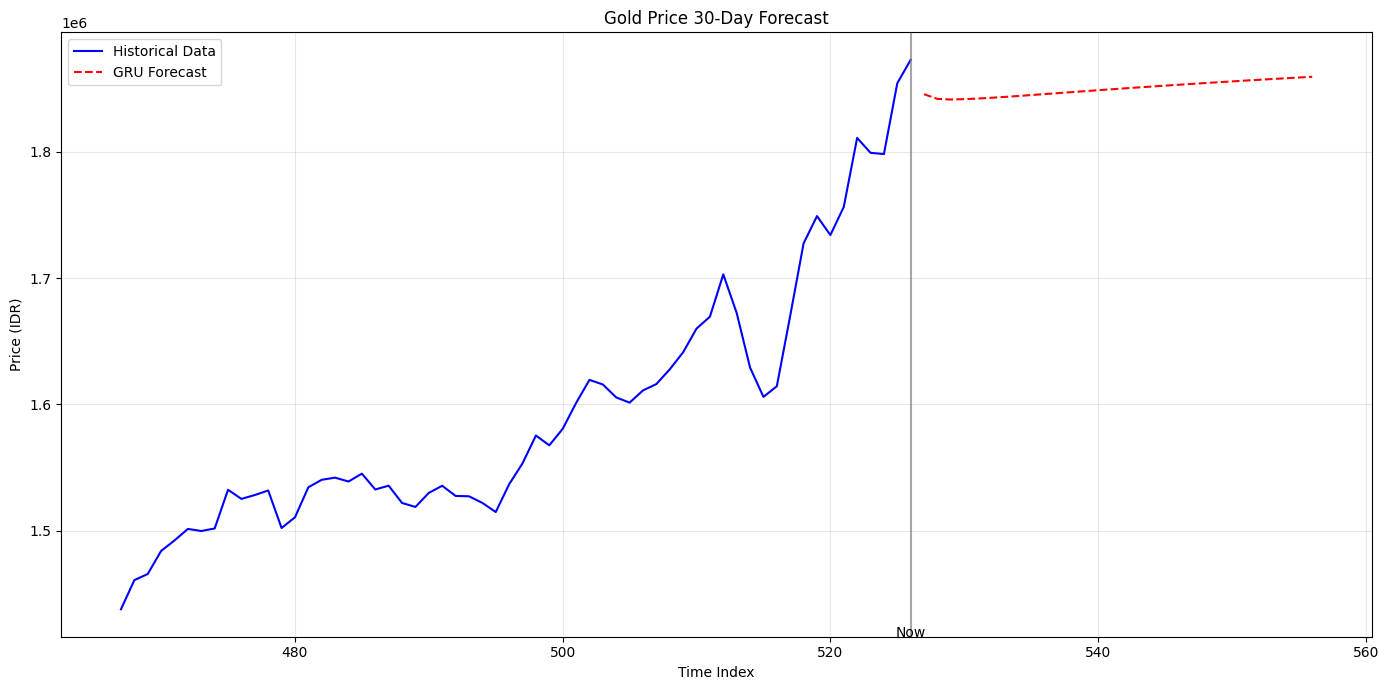


30-Day Gold Price Forecast:
----------------------------------------
Start Index: 527
End Index: 556
----------------------------------------
GRU Forecast - Last Day: 1859472.38 IDR
----------------------------------------
GRU  - Min: 1841465.75, Max: 1859472.38, Mean: 1850020.75 IDR

Forecast DataFrame Preview:
       GRU_Forecast
Index              
527     1845663.125
528     1841963.750
529     1841465.750
530     1841749.500
531     1842222.250


In [20]:
# Function to forecast future values
def forecast_future(model, last_sequence, n_steps=30):
    """
    Forecast n_steps ahead using the trained model

    Parameters:
    model: Trained LSTM or GRU model
    last_sequence: The last sequence from our dataset (window size length)
    n_steps: Number of steps to forecast ahead

    Returns:
    Array of forecasted values
    """
    future_predictions = []

    # Make a copy of the last sequence
    curr_sequence = last_sequence.copy()

    # Predict n_steps ahead one by one
    for _ in range(n_steps):
        # Reshape for model input
        curr_sequence_reshaped = curr_sequence.reshape(1, curr_sequence.shape[0], 1)

        # Get prediction for next step
        next_pred = model.predict(curr_sequence_reshaped, verbose=0)[0][0]

        # Add to our forecasts
        future_predictions.append(next_pred)

        # Update the sequence by removing the first element and adding the new prediction
        curr_sequence = np.append(curr_sequence[1:], next_pred)

    return np.array(future_predictions)

# Get the last sequence from the training data
last_sequence = data[-WINDOW_SIZE:]

# Forecast 30 days ahead with GRU model
future_norm_gru = forecast_future(model_gru, last_sequence, n_steps=30)

# Convert normalized predictions back to original scale
future_prices_gru = scaler.inverse_transform(future_norm_gru.reshape(-1, 1))

# Create indices for plotting
last_idx = len(df)
future_indices = np.arange(last_idx, last_idx + 30)

# Plot the predictions
plt.figure(figsize=(14, 7))

# Plot historical data (last 60 days)
historical_indices = np.arange(last_idx - 60, last_idx)
historical_data = df['Terakhir'].iloc[-60:].values
plt.plot(historical_indices, historical_data, label='Historical Data', color='blue')

# Plot forecasts
plt.plot(future_indices, future_prices_gru, label='GRU Forecast', color='red', linestyle='--')

plt.axvline(x=last_idx - 1, color='gray', linestyle='-', alpha=0.7)
plt.text(last_idx - 1, plt.ylim()[0], 'Now', ha='center')

plt.title('Gold Price 30-Day Forecast')
plt.xlabel('Time Index')
plt.ylabel('Price (IDR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print forecast statistics
print("\n30-Day Gold Price Forecast:")
print("-" * 40)
print(f"Start Index: {future_indices[0]}")
print(f"End Index: {future_indices[-1]}")
print("-" * 40)
print(f"GRU Forecast - Last Day: {future_prices_gru[-1][0]:.2f} IDR")
print("-" * 40)
print(f"GRU  - Min: {future_prices_gru.min():.2f}, Max: {future_prices_gru.max():.2f}, Mean: {future_prices_gru.mean():.2f} IDR")

# Save forecasts to DataFrame
forecast_df = pd.DataFrame({
    'Index': future_indices,
    'GRU_Forecast': future_prices_gru.flatten()
})
forecast_df.set_index('Index', inplace=True)
print("\nForecast DataFrame Preview:")
print(forecast_df.head())



**Interpretasi Grafik Prediksi**

Grafik di atas menunjukkan hasil prediksi harga emas selama 30 hari ke depan (garis merah putus-putus) dibandingkan dengan tren historis 60 hari terakhir (garis biru).

Terlihat bahwa model GRU memproyeksikan tren harga emas cenderung **stabil naik** dengan kenaikan yang lebih moderat dibandingkan fluktuasi tajam di masa lalu. Model menangkap arah tren secara umum namun tidak terlalu agresif dalam mengikuti pola lonjakan harga yang ekstrem.

Prediksi ini dapat memberikan gambaran awal bagi investor atau pengambil keputusan untuk mengantisipasi pergerakan harga dalam waktu dekat.

**Interpretasi Tabel Hasil Prediksi**

Tabel di atas menampilkan hasil prediksi harga emas selama 30 hari ke depan yang dihasilkan oleh model GRU. Setiap baris merepresentasikan nilai prediksi untuk satu hari ke depan berdasarkan indeks waktu yang berurutan.

Berikut beberapa ringkasan statistik dari hasil prediksi:

- **Harga prediksi pada hari ke-30**: Rp 1.859.472,38
- **Harga maksimum selama 30 hari**: Rp 1.859.472,38
- **Harga minimum selama 30 hari**: Rp 1.841.465,75
- **Rata-rata prediksi**: Rp 1.850.020,75

Rentang harga yang relatif sempit menunjukkan bahwa model memproyeksikan **stabilitas harga** dalam jangka pendek. Tidak ada lonjakan atau penurunan tajam yang terdeteksi, sehingga proyeksi ini dapat digunakan sebagai dasar awal untuk pengambilan keputusan yang bersifat konservatif.

Hasil prediksi ini juga disimpan ke dalam sebuah DataFrame (`forecast_df`) untuk memudahkan analisis lebih lanjut atau ekspor ke format lain seperti `.csv` atau `.xlsx`.


In [22]:
forecast_df

,GRU_Forecast
Index,
527,1845663.125
528,1841963.750
529,1841465.750
530,1841749.500
531,1842222.250
532,1842827.875
533,1843512.250
534,1844241.375
535,1844995.625


## **Conclusion**

Dalam proyek ini, dilakukan proses prediksi harga emas global dalam IDR menggunakan dua jenis model deep learning untuk data deret waktu, yaitu **LSTM** dan **GRU**. Berikut adalah poin-poin utama dari hasil yang diperoleh:

1. **Data Preparation dan Normalisasi**  
   Data harga emas dari 24 April 2023 hingga 22 April 2025 diproses dan dinormalisasi untuk memastikan stabilitas dan efisiensi dalam pelatihan model.

2. **Model Building dan Training**  
   Dua arsitektur model dibangun dan dilatih menggunakan data historis:
   - LSTM: mampu mengikuti tren secara umum, namun menghasilkan error yang lebih besar.
   - GRU: memberikan hasil prediksi yang lebih akurat dan efisien, serta lebih baik dalam mengikuti pola harga emas.

3. **Evaluasi Model**  
   Berdasarkan metrik evaluasi:
   - **GRU**: RMSE = 20.821, MAE = 15.176
   - **LSTM**: RMSE = 41.024, MAE = 28.934  
   Dengan hasil tersebut, **model GRU dinyatakan sebagai model terbaik** untuk digunakan dalam prediksi harga emas selanjutnya.

4. **Prediksi 30 Hari ke Depan**  
   Model GRU digunakan untuk memprediksi harga emas selama 30 hari ke depan. Hasilnya menunjukkan tren harga yang cenderung stabil dan naik secara moderat, dengan nilai rata-rata prediksi sebesar **Rp 1.850.020,75**.

**Final Insight**

Model GRU berhasil menunjukkan performa yang solid dalam memprediksi harga emas dan dapat digunakan sebagai dasar analisis untuk keputusan finansial dalam jangka pendek. Namun, untuk aplikasi di dunia nyata, disarankan untuk mempertimbangkan faktor eksternal lain seperti nilai tukar, inflasi, dan sentimen global untuk prediksi yang lebih komprehensif.

